# Import libs

In [1]:
import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Artificial II dataset

In [2]:
Xy = pd.read_csv('./datasets/artificial_II.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
b_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
b_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     3.0  1.0  2.0
3.0   23    0    0
1.0    0   20    0
2.0    0    0   17
     3.0  2.0  1.0
3.0   24    0    0
2.0    0   25    0
1.0    0    0   11
     1.0  2.0  3.0
1.0   26    0    0
2.0    0   19    0
3.0    0    0   15
     3.0  2.0  1.0
3.0   18    0    0
2.0    0   23    0
1.0    0    0   19
     2.0  3.0  1.0
2.0   21    0    0
3.0    0   19    0
1.0    0    0   20
     2.0  1.0  3.0
2.0   20    0    0
1.0    0   16    0
3.0    0    0   24
     3.0  1.0  2.0
3.0   17    0    0
1.0    0   29    0
2.0    0    0   14
     2.0  1.0  3.0
2.0   15    0    0
1.0    0   27    0
3.0    0    0   18
     2.0  3.0  1.0
2.0   12    0    0
3.0    0   23    0
1.0    0    0   25
     1.0  3.0  2.0
1.0   18    0    0
3.0    0   14    0
2.0    0    0   28
     1.0  2.0  3.0
1.0  

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,3.0,1.0,2.0
3.0,19,0,0
1.0,0,20,0
2.0,0,0,20


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     3.0  1.0  2.0
3.0   23    0    0
1.0    0   20    0
2.0    0    0   17
     3.0  2.0  1.0
3.0   24    0    0
2.0    0   25    0
1.0    0    0   11
     1.0  2.0  3.0
1.0   26    0    0
2.0    0   19    0
3.0    0    0   15
     3.0  2.0  1.0
3.0   18    0    0
2.0    0   23    0
1.0    0    0   19
     2.0  3.0  1.0
2.0   21    0    0
3.0    0   19    0
1.0    0    0   20
     2.0  1.0  3.0
2.0   20    0    0
1.0    0   16    0
3.0    0    0   24
     3.0  1.0  2.0
3.0   17    0    0
1.0    0   29    0
2.0    0    0   14
     2.0  1.0  3.0
2.0   15    0    0
1.0    0   27    0
3.0    0    0   18
     2.0  3.0  1.0
2.0   12    0    0
3.0    0   23    0
1.0    0    0   25
     1.0  3.0  2.0
1.0   18    0    0
3.0    0   14    0
2.0    0    0   28
     1.0  2.0  3.0
1.0  

In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,3.0,1.0,2.0
3.0,19,0,0
1.0,0,20,0
2.0,0,0,20


# Showing bayes informations computed

In [8]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     3.0  1.0  2.0
3.0   23    0    0
1.0    0   20    0
2.0    0    0   17
     3.0  2.0  1.0
3.0   24    0    0
2.0    0   25    0
1.0    0    0   11
     1.0  2.0  3.0
1.0   26    0    0
2.0    0   19    0
3.0    0    0   15
     3.0  2.0  1.0
3.0   18    0    0
2.0    0   23    0
1.0    0    0   19
     2.0  3.0  1.0
2.0   21    0    0
3.0    0   19    0
1.0    0    0   20
     2.0  1.0  3.0
2.0   20    0    0
1.0    0   16    0
3.0    0    0   24
     3.0  1.0  2.0
3.0   17    0    0
1.0    0   29    0
2.0    0    0   14
     2.0  1.0  3.0
2.0   15    0    0
1.0    0   27    0
3.0    0    0   18
     2.0  3.0  1.0
2.0   12    0    0
3.0    0   23    0
1.0    0    0   25
     1.0  3.0  2.0
1.0   18    0    0
3.0    0   14    0
2.0    0    0   28
     1.0  2.0  3.0
1.0

In [9]:
confusion_matrix_mean(b_confusion_matrix_list)

,3.0,1.0,2.0
3.0,19,0,0
1.0,0,20,0
2.0,0,0,20


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
            0         1
74  -1.110839 -1.480369
57  -1.058966 -0.875521
273  0.966805  1.176709
18  -1.048592 -0.970849
229  0.824374  1.144981
..        ...       ...
169 -0.933978  1.022088
85  -0.889160 -0.946495
22  -1.051673 -1.211898
1   -1.308985 -0.995508
144 -1.176092  0.963702

[240 rows x 2 columns]
Test dataset:
            0         1
257  1.381269  0.821333
204  0.909896  1.348003
135 -0.899470  0.850688
6   -0.843245 -0.957184
149 -1.178716  0.787824
8   -0.693618 -1.044386
151 -0.710361  1.116096
264  1.042470  1.004735
4   -1.220272 -1.167834
115 -1.114869  0.861528
90  -0.755261 -1.213144
188 -1.155444  1.063141
87  -0.949441 -0.780632
21  -0.998352 -1.050897
186 -0.807636  1.080220
118 -1.104069  1.144623
184 -1.199352  0.909633
248  0.954011  1.007223
265  0.947789  1.148175
192 -1.204885  1.303805
239  1.235630  1.256510
244  0.644758  0.735735
131 -0.766565  0.489171
241  0.897718  0.846116
181 -0.893702  1.002027
69  -1.264997 -1.133642
255  1.0564

# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

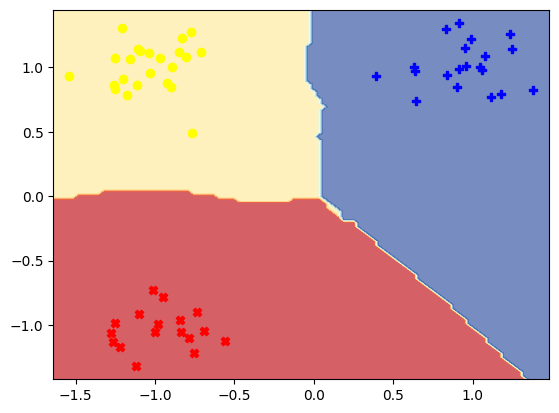

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

one = np.where(knn_y_pred == 1)
two = np.where(knn_y_pred == 2)
three = np.where(knn_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()

# Plotting dmc decision surface

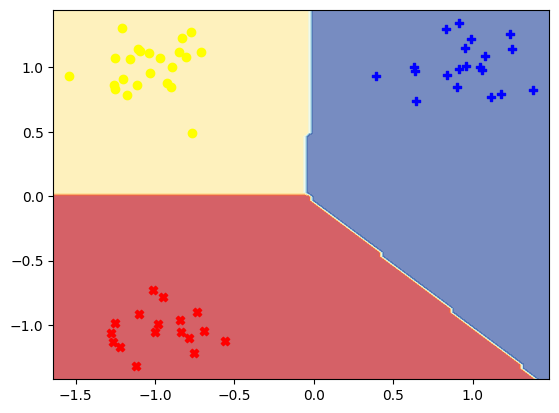

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

one = np.where(dmc_y_pred == 1)
two = np.where(dmc_y_pred == 2)
three = np.where(dmc_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()

# Plotting naive bayes decision surface

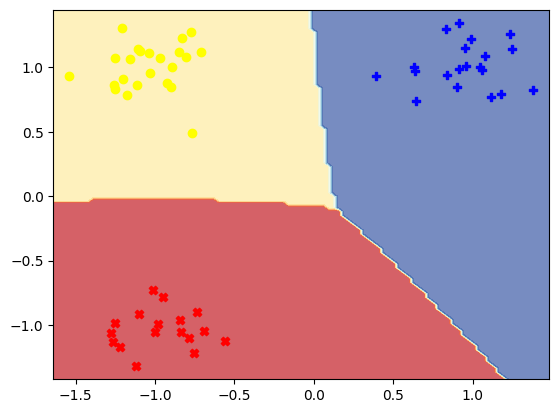

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

one = np.where(b_y_pred == 1)
two = np.where(b_y_pred == 2)
three = np.where(b_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()